In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
phishing = pd.read_excel("phishing  url.xlsx")
phishing.head(10)

,URL,Label,Protocol
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,UDP
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,UDP
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,UDP
3,mail.printakid.com/www.online.americanexpress....,bad,UDP
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,UDP
5,smilesvoegol.servebbs.org/voegol.php,bad,UDP
6,premierpaymentprocessing.com/includes/boleto-2...,bad,UDP
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad,UDP
8,super1000.info/docs,bad,UDP
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad,UDP


In [3]:
phishing.tail()

,URL,Label,Protocol
3884,'iboon.org/iboon\%20paypal.htm',good,ftp
3885,nail-service.com/loreal.files/redirect.php,good,sftp
3886,savageranch.com/portal/ativar/plugin/BancodoBr...,good,Http
3887,'savageranch.com/portal/bnzonlineaccess/accoun...,good,Https
3888,giveu.asadal.com/GoodMatch/SARS.html,good,Http


In [4]:
print(phishing.shape)

(3889, 3)


In [5]:
phishing.Label.value_counts()

Label
bad     2676
good    1213
Name: count, dtype: int64

In [6]:
phishing.Label.value_counts()

Label
bad     2676
good    1213
Name: count, dtype: int64

In [7]:
phishing.URL.value_counts()


URL
nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526    1
www.netofficials.com/media/system/propertiesremax.html                                                                                                                                                                               1
bit.ly/LIg5jj?=fidel03921039                                                                                                                                                                                                         1
bit.ly/NheAvN?=3Dfide98239382                                                                                                                                                                                                        1
credit-habbo-gratos.yolasite.com/contact-us.php                         

In [8]:
phishing.isnull().sum()

URL         0
Label       0
Protocol    0
dtype: int64

In [9]:
phishing.dropna(inplace=True)

In [10]:
phishing.isnull().sum()

URL         0
Label       0
Protocol    0
dtype: int64

In [11]:
phishing.duplicated().sum()

0

In [12]:
phishing.isna().sum()

URL         0
Label       0
Protocol    0
dtype: int64

In [13]:
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URL       3889 non-null   object
 1   Label     3889 non-null   object
 2   Protocol  3889 non-null   object
dtypes: object(3)
memory usage: 91.3+ KB


In [14]:
phishing.describe()

,URL,Label,Protocol
count,3889,3889,3889
unique,3889,2,20
top,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,ICMP
freq,1,2676,1524


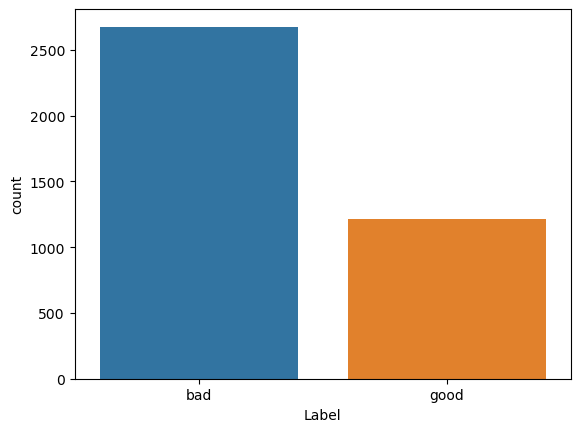

In [15]:
sns.countplot(data=phishing, x="Label")
plt.show()

In [16]:
df_shuffled = shuffle(phishing, random_state=42)

In [17]:
data_size = 5000

In [18]:
phishing_url = df_shuffled[:data_size].copy()

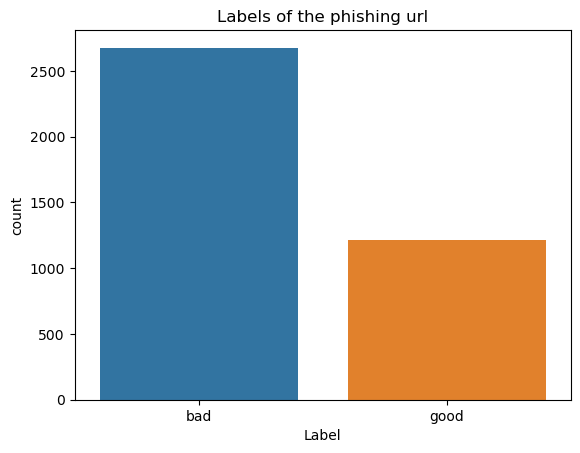

In [19]:
sns.countplot(data=phishing_url, x="Label")
plt.title("Labels of the phishing url")

plt.show()

In [20]:
phishing_url.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3889 entries, 2392 to 3174
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URL       3889 non-null   object
 1   Label     3889 non-null   object
 2   Protocol  3889 non-null   object
dtypes: object(3)
memory usage: 121.5+ KB


In [21]:
phishing_url.replace({'good':0, 'bad':1}, inplace=True)

In [22]:
phishing_url.Label.value_counts()

Label
1    2676
0    1213
Name: count, dtype: int64

In [23]:
phishing_url.replace({'ICMP':0, 'TCP':1,'UDP':2,'http':3}, inplace=True)

In [24]:
phishing_url.Protocol.value_counts()

Protocol
0              1524
tcp             696
1               561
2               476
3               166
udp             116
SSH-Patator     113
SNMP             52
icmp             43
Telnet           38
Dns              27
imap             18
pop3             16
smtp             15
Http             10
Https             7
ftp               4
RDP               3
sftp              3
snmp              1
Name: count, dtype: int64

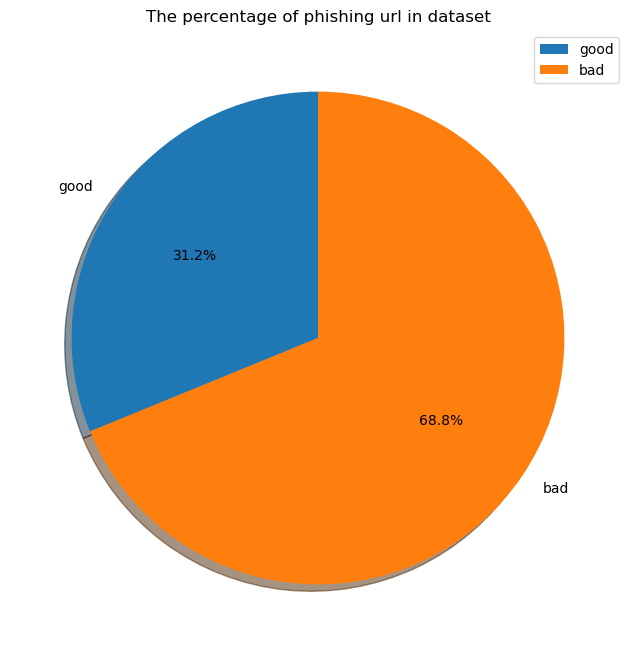

In [25]:
labels = ["good",'bad']
sizes = [dict(phishing_url.Label.value_counts())[0], dict(phishing_url.Label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["good",'bad'])
plt.title('The percentage of phishing url in dataset')
plt.show()

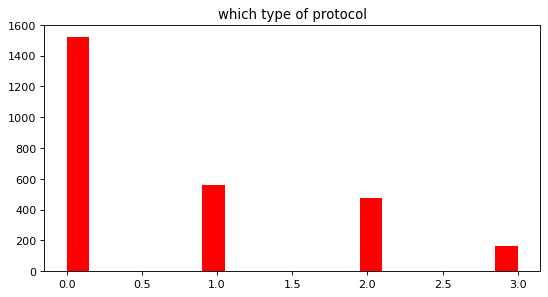

In [26]:
phishing_url['Protocol'] = pd.to_numeric(phishing_url['Protocol'], errors='coerce')
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(phishing_url.Protocol, bins=20, color='r')
plt.title('which type of protocol')
plt.show()

In [27]:
phishing_url.head()

,URL,Label,Protocol
2392,www.marketplus.com.ar/cart/includes/local/1.php,1,0.0
2319,www.qu100.com/phpmyadmin/778766777/index.html,1,0.0
2430,uploads.boxify.me/83141/novo.ini,1,0.0
3697,moedasgeraaaa.blogspot.com/,0,NaN
315,paypal.com.us.cgi.bin.webscr.cmd.login.member....,1,2.0


In [28]:
phishing_url.tail()

,URL,Label,Protocol
1130,bit.ly/M77GIA?ferias=93840923804983,0,0.0
1294,home.comcast.net/~rlewis260/ISAPIdllCustomerSu...,0,0.0
860,montecitoweddings.com/wp-content//themes/Karma...,0,1.0
3507,webcamopenchat.blogspot.com/,0,NaN
3174,www.eov.cl/noticias/imagenes/paypal.com.au/htt...,1,NaN


In [29]:

X =phishing_url[['URL','Protocol']].copy()
y =phishing_url.Label.copy()

In [30]:
X

,URL,Protocol
2392,www.marketplus.com.ar/cart/includes/local/1.php,0.0
2319,www.qu100.com/phpmyadmin/778766777/index.html,0.0
2430,uploads.boxify.me/83141/novo.ini,0.0
3697,moedasgeraaaa.blogspot.com/,NaN
315,paypal.com.us.cgi.bin.webscr.cmd.login.member....,2.0
...,...,...
1130,bit.ly/M77GIA?ferias=93840923804983,0.0
1294,home.comcast.net/~rlewis260/ISAPIdllCustomerSu...,0.0
860,montecitoweddings.com/wp-content//themes/Karma...,1.0
3507,webcamopenchat.blogspot.com/,NaN


In [31]:
y

2392    1
2319    1
2430    1
3697    0
315     1
       ..
1130    0
1294    0
860     0
3507    0
3174    1
Name: Label, Length: 3889, dtype: int64

In [32]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")
cv = CountVectorizer()

In [33]:
def prepare_data(X) :
    X['text_tokenized'] = X.URL.map(lambda t: tokenizer.tokenize(t))
    X['text_stemmed'] = X.text_tokenized.map(lambda t: [stemmer.stem(word) for word in t])
    X['text_sent'] = X.text_stemmed.map(lambda t: ' '.join(t))
    features = cv.fit_transform(X.text_sent)
    return X, features

In [34]:
X, features = prepare_data(X)

In [35]:
X

,URL,Protocol,text_tokenized,text_stemmed,text_sent
2392,www.marketplus.com.ar/cart/includes/local/1.php,0.0,"[www, marketplus, com, ar, cart, includes, loc...","[www, marketplus, com, ar, cart, includ, local...",www marketplus com ar cart includ local php
2319,www.qu100.com/phpmyadmin/778766777/index.html,0.0,"[www, qu, com, phpmyadmin, index, html]","[www, qu, com, phpmyadmin, index, html]",www qu com phpmyadmin index html
2430,uploads.boxify.me/83141/novo.ini,0.0,"[uploads, boxify, me, novo, ini]","[upload, boxifi, me, novo, ini]",upload boxifi me novo ini
3697,moedasgeraaaa.blogspot.com/,NaN,"[moedasgeraaaa, blogspot, com]","[moedasgeraaaa, blogspot, com]",moedasgeraaaa blogspot com
315,paypal.com.us.cgi.bin.webscr.cmd.login.member....,2.0,"[paypal, com, us, cgi, bin, webscr, cmd, login...","[paypal, com, us, cgi, bin, webscr, cmd, login...",paypal com us cgi bin webscr cmd login member ...
...,...,...,...,...,...
1130,bit.ly/M77GIA?ferias=93840923804983,0.0,"[bit, ly, M, GIA, ferias]","[bit, ly, m, gia, feria]",bit ly m gia feria
1294,home.comcast.net/~rlewis260/ISAPIdllCustomerSu...,0.0,"[home, comcast, net, rlewis, ISAPIdllCustomerS...","[home, comcast, net, rlewi, isapidllcustomersu...",home comcast net rlewi isapidllcustomersupport...
860,montecitoweddings.com/wp-content//themes/Karma...,1.0,"[montecitoweddings, com, wp, content, themes, ...","[montecitowed, com, wp, content, theme, karma,...",montecitowed com wp content theme karma functi...
3507,webcamopenchat.blogspot.com/,NaN,"[webcamopenchat, blogspot, com]","[webcamopenchat, blogspot, com]",webcamopenchat blogspot com


In [36]:
features

<3889x7174 sparse matrix of type '<class 'numpy.int64'>'
	with 33678 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate sample data
X, y = make_classification(n_samples=4000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=100)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred = dtree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.97125
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       401
           1       0.97      0.97      0.97       399

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [38]:
!pip install xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Generate sample data
X, y = make_classification(n_samples=3000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=100)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9233333333333333


In [39]:
algorithms = [ "Decision Tree",  "XGBoost"]
training_accuracies = [ 0.92, 0.91]  # Example training accuracies
testing_accuracies = [ 0.88,  0.89]    # Example testing accuracies

# Print headers
print("Algorithm\t\tTraining Accuracy\tTesting Accuracy")

# Iterate over each algorithm
for algorithm, train_acc, test_acc in zip(algorithms, training_accuracies, testing_accuracies):
    # Print the algorithm name with actual accuracy values
    print(f"{algorithm.ljust(20)}\t{train_acc:.6f}\t\t{test_acc:.6f}")


Algorithm		Training Accuracy	Testing Accuracy
Decision Tree       	0.920000		0.880000
XGBoost             	0.910000		0.890000


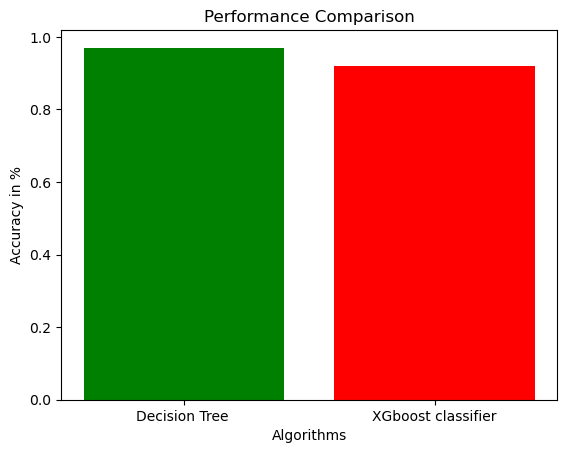

In [40]:
from matplotlib import pyplot as plt
# x-coordinates of left sides of bars  
left = [1,2] 
  
# heights of bars 
height = [0.97, 0.92] 
  
# labels for bars 
tick_label = ['Decision Tree ','XGboost classifier'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = [ 'green','red']) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy in %') 
# plot title 
plt.title('Performance Comparison') 
  
# function to show the plot 
plt.rcParams['figure.figsize'] = (450,400)
plt.show()